In [2]:
import os
import cv2
import time
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import misc
from imutils import paths
from Detection import Detection
from Recognition import Recognition
import align_dataset
import preprocess
import pandas as pd
import gen_classifier
import classify_image

In [3]:
#Input and Output paths
train_raw_path = "../Dataset/train_raw/"
train_aligned_path = "../Dataset/train_aligned/"
output_classifier_path = "../util/classifier.pkl"
test_image_input_path = "/home/santoshv/facenet/data/images/test_raw/ravikiran/Capture+_2019-02-19-16-37-01.png"
augmentation = False
#Not yet Implemented.
if augmentation == True:
    augmentation_folder_path = "../Dataset/augmentation_folder/"

In [4]:
#Path for the detection and recognition pb files
Detection_model_path = "../Models/Detection_mtcnn.pb"
Recognition_model_path = "../Models/Recognition_facenet.pb"

In [5]:
#Instances of detection and recognition are being created.
#Instances are created to avoid loading the graphs and sessions again and again for every frame.
detection = Detection(Detection_model_path)
recognition = Recognition(Recognition_model_path)


Detection Model Graph Initialized
Recognition Model Graph Initialized


['sandipan', 'ravikiran', 'santosh', 'somaliya']
[INFO] processing image 1/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/11_28_0.jpg
[INFO] processing image 2/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/6_23_0.jpg
[INFO] processing image 3/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/10_11_0.jpg
[INFO] processing image 4/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/11_1_0.jpg
[INFO] processing image 5/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/santosh/9_23_0.jpg
[INFO] processing image 6/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/11_17_0.jpg
[INFO] processing image 7/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/11_15_0.jpg
[INFO] processing image 8/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/6_11_0.jpg
[INFO] processing image 9/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/10_30_0.jpg
[INFO] processing image 10/1020
NUMBER OF BOXES 3
../Dataset/train_aligned/santosh/8_19_0.jpg
[INFO] processi

NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/9_27_0.jpg
[INFO] processing image 89/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/5_11_0.jpg
[INFO] processing image 90/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/9_25_0.jpg
[INFO] processing image 91/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/santosh/4_7_0.jpg
[INFO] processing image 92/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/2_16_0.jpg
[INFO] processing image 93/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/6_7_0.jpg
[INFO] processing image 94/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/7_5_0.jpg
[INFO] processing image 95/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/santosh/3_20_0.jpg
[INFO] processing image 96/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/2_19_0.jpg
[INFO] processing image 97/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/11_13_0.jpg
[INFO] processing image 98/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/7_3_0.jpg
[

NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/11_10_0.jpg
[INFO] processing image 175/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/santosh/2_1_0.jpg
[INFO] processing image 176/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/7_6_0.jpg
[INFO] processing image 177/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/1_8_0.jpg
[INFO] processing image 178/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/6_27_0.jpg
[INFO] processing image 179/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/santosh/7_19_0.jpg
[INFO] processing image 180/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/santosh/9_28_0.jpg
[INFO] processing image 181/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/6_4_0.jpg
[INFO] processing image 182/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/2_14_0.jpg
[INFO] processing image 183/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/4_14_0.jpg
[INFO] processing image 184/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/santosh/2_

NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/8_23_0.jpg
[INFO] processing image 262/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/2_28_0.jpg
[INFO] processing image 263/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/10_9_0.jpg
[INFO] processing image 264/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/4_10_0.jpg
[INFO] processing image 265/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/1_29_0.jpg
[INFO] processing image 266/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/8_14_0.jpg
[INFO] processing image 267/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/2_11_0.jpg
[INFO] processing image 268/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/3_23_0.jpg
[INFO] processing image 269/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/4_23_0.jpg
[INFO] processing image 270/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh/6_17_0.jpg
[INFO] processing image 271/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/santosh

NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/5_8_0.jpg
[INFO] processing image 349/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/3_3_0.jpg
[INFO] processing image 350/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/3_27_0.jpg
[INFO] processing image 351/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/4_4_0.jpg
[INFO] processing image 352/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/4_18_0.jpg
[INFO] processing image 353/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/1_1_0.jpg
[INFO] processing image 354/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/6_13_0.jpg
[INFO] processing image 355/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/7_10_0.jpg
[INFO] processing image 356/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/5_25_0.jpg
[INFO] processing image 357/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/3_21_0.jpg
[INFO] processing image 358/1020
NUMBER OF BOXES 1
../Dataset/train

NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/5_30_0.jpg
[INFO] processing image 434/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/6_14_0.jpg
[INFO] processing image 435/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/1_7_0.jpg
[INFO] processing image 436/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/5_22_0.jpg
[INFO] processing image 437/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/3_18_0.jpg
[INFO] processing image 438/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/5_17_0.jpg
[INFO] processing image 439/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/3_17_0.jpg
[INFO] processing image 440/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/5_20_0.jpg
[INFO] processing image 441/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/4_22_0.jpg
[INFO] processing image 442/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/2_30_0.jpg
[INFO] processing image 443/1020
NUMBER OF BOXES 1
../Dataset/tr

NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/8_23_0.jpg
[INFO] processing image 519/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/2_28_0.jpg
[INFO] processing image 520/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/4_10_0.jpg
[INFO] processing image 521/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/1_29_0.jpg
[INFO] processing image 522/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/8_14_0.jpg
[INFO] processing image 523/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/2_11_0.jpg
[INFO] processing image 524/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/3_23_0.jpg
[INFO] processing image 525/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/ravikiran/4_23_0.jpg
[INFO] processing image 526/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/6_17_0.jpg
[INFO] processing image 527/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/ravikiran/3_14_0.jpg
[INFO] processing image 528/1020
NUMBER OF BOXES 1
../Dataset/t

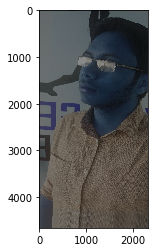

NUMBER OF BOXES 0
[INFO] processing image 598/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/7_27_0.jpg
[INFO] processing image 599/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/1_3_0.jpg
[INFO] processing image 600/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/4_27_0.jpg
[INFO] processing image 601/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/7_16_0.jpg
[INFO] processing image 602/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/8_25_0.jpg
[INFO] processing image 603/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/2_4_0.jpg
[INFO] processing image 604/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/3_30_0.jpg
[INFO] processing image 605/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/2_13_0.jpg
[INFO] processing image 606/1020
NUMBER OF BOXES 4
../Dataset/train_aligned/somaliya/3_19_0.jpg
[INFO] processing image 607/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/3_9_0.jpg
[INFO] processing image 6

NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/7_26_0.jpg
[INFO] processing image 685/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/4_15_0.jpg
[INFO] processing image 686/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/4_1_0.jpg
[INFO] processing image 687/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/7_25_0.jpg
[INFO] processing image 688/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/3_11_0.jpg
[INFO] processing image 689/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/8_12_0.jpg
[INFO] processing image 690/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/6_24_0.jpg
[INFO] processing image 691/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/6_5_0.jpg
[INFO] processing image 692/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/2_1_0.jpg
[INFO] processing image 693/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/7_6_0.jpg
[INFO] processing image 694/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/s

NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/6_2_0.jpg
[INFO] processing image 773/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/5_21_0.jpg
[INFO] processing image 774/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/1_4_0.jpg
[INFO] processing image 775/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/4_13_0.jpg
[INFO] processing image 776/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/6_30_0.jpg
[INFO] processing image 777/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/3_4_0.jpg
[INFO] processing image 778/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/1_12_0.jpg
[INFO] processing image 779/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/8_3_0.jpg
[INFO] processing image 780/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/1_15_0.jpg
[INFO] processing image 781/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/somaliya/7_21_0.jpg
[INFO] processing image 782/1020
NUMBER OF BOXES 8
../Dataset/train_aligned/s

NUMBER OF BOXES 2
../Dataset/train_aligned/sandipan/2_12_0.jpg
[INFO] processing image 859/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/3_2_0.jpg
[INFO] processing image 860/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/sandipan/2_27_0.jpg
[INFO] processing image 861/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/7_28_0.jpg
[INFO] processing image 862/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/5_11_0.jpg
[INFO] processing image 863/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/sandipan/4_7_0.jpg
[INFO] processing image 864/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/sandipan/2_16_0.jpg
[INFO] processing image 865/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/6_7_0.jpg
[INFO] processing image 866/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/7_5_0.jpg
[INFO] processing image 867/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/3_20_0.jpg
[INFO] processing image 868/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/s

NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/3_16_0.jpg
[INFO] processing image 945/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/7_9_0.jpg
[INFO] processing image 946/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/sandipan/5_14_0.jpg
../Dataset/train_aligned/sandipan/5_14_1.jpg
[INFO] processing image 947/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/5_15_0.jpg
[INFO] processing image 948/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/7_20_0.jpg
[INFO] processing image 949/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/sandipan/4_3_0.jpg
[INFO] processing image 950/1020
NUMBER OF BOXES 2
../Dataset/train_aligned/sandipan/2_5_0.jpg
[INFO] processing image 951/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/2_15_0.jpg
[INFO] processing image 952/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/3_8_0.jpg
[INFO] processing image 953/1020
NUMBER OF BOXES 1
../Dataset/train_aligned/sandipan/7_1_0.jpg
[INFO] processing image 954/1020


In [7]:
#creating the identity directories inside the output folder
#cropping faces using MTCNN face detection model from the model path 
#writing the respective faces in the directories created
#this function needs the paths of raw training images folder, output aligned folder and detection model path
#We suggest to manually remove noise from the aligned folder as MTCNN can detect some false positives which will
#effect recognition performance.Making sure we send right data to the model will leave us with good accuracy.
align_dataset.align_data(train_raw_path,train_aligned_path,detection)

In [8]:
#Getting the features of the faces stored at train_aligned_path in the form of 512-D embeddings
#We are using the FaceNet Inception-Resnet architecture to generate the embeddings which uses softmax loss
#The model is not the same that was mentioned in facenet paper, as it has different neural structure and loss
#Generated embeddings and the labels are given to a support vector classfier 
#The trained model is stored in the file path given to the function
gen_classifier.rec_gen_classifier(train_aligned_path , recognition ,output_classifier_path)

[INFO] Processing face 0
[INFO] Processing face 1
[INFO] Processing face 2
[INFO] Processing face 3
[INFO] Processing face 4
[INFO] Processing face 5
[INFO] Processing face 6
[INFO] Processing face 7
[INFO] Processing face 8
[INFO] Processing face 9
[INFO] Processing face 10
[INFO] Processing face 11
[INFO] Processing face 12
[INFO] Processing face 13
[INFO] Processing face 14
[INFO] Processing face 15
[INFO] Processing face 16
[INFO] Processing face 17
[INFO] Processing face 18
[INFO] Processing face 19
[INFO] Processing face 20
[INFO] Processing face 21
[INFO] Processing face 22
[INFO] Processing face 23
[INFO] Processing face 24
[INFO] Processing face 25
[INFO] Processing face 26
[INFO] Processing face 27
[INFO] Processing face 28
[INFO] Processing face 29
[INFO] Processing face 30
[INFO] Processing face 31
[INFO] Processing face 32
[INFO] Processing face 33
[INFO] Processing face 34
[INFO] Processing face 35
[INFO] Processing face 36
[INFO] Processing face 37
[INFO] Processing face

[INFO] Processing face 308
[INFO] Processing face 309
[INFO] Processing face 310
[INFO] Processing face 311
[INFO] Processing face 312
[INFO] Processing face 313
[INFO] Processing face 314
[INFO] Processing face 315
[INFO] Processing face 316
[INFO] Processing face 317
[INFO] Processing face 318
[INFO] Processing face 319
[INFO] Processing face 320
[INFO] Processing face 321
[INFO] Processing face 322
[INFO] Processing face 323
[INFO] Processing face 324
[INFO] Processing face 325
[INFO] Processing face 326
[INFO] Processing face 327
[INFO] Processing face 328
[INFO] Processing face 329
[INFO] Processing face 330
[INFO] Processing face 331
[INFO] Processing face 332
[INFO] Processing face 333
[INFO] Processing face 334
[INFO] Processing face 335
[INFO] Processing face 336
[INFO] Processing face 337
[INFO] Processing face 338
[INFO] Processing face 339
[INFO] Processing face 340
[INFO] Processing face 341
[INFO] Processing face 342
[INFO] Processing face 343
[INFO] Processing face 344
[

[INFO] Processing face 613
[INFO] Processing face 614
[INFO] Processing face 615
[INFO] Processing face 616
[INFO] Processing face 617
[INFO] Processing face 618
[INFO] Processing face 619
[INFO] Processing face 620
[INFO] Processing face 621
[INFO] Processing face 622
[INFO] Processing face 623
[INFO] Processing face 624
[INFO] Processing face 625
[INFO] Processing face 626
[INFO] Processing face 627
[INFO] Processing face 628
[INFO] Processing face 629
[INFO] Processing face 630
[INFO] Processing face 631
[INFO] Processing face 632
[INFO] Processing face 633
[INFO] Processing face 634
[INFO] Processing face 635
[INFO] Processing face 636
[INFO] Processing face 637
[INFO] Processing face 638
[INFO] Processing face 639
[INFO] Processing face 640
[INFO] Processing face 641
[INFO] Processing face 642
[INFO] Processing face 643
[INFO] Processing face 644
[INFO] Processing face 645
[INFO] Processing face 646
[INFO] Processing face 647
[INFO] Processing face 648
[INFO] Processing face 649
[

[INFO] Processing face 917
[INFO] Processing face 918
[INFO] Processing face 919
[INFO] Processing face 920
[INFO] Processing face 921
[INFO] Processing face 922
[INFO] Processing face 923
[INFO] Processing face 924
[INFO] Processing face 925
[INFO] Processing face 926
[INFO] Processing face 927
[INFO] Processing face 928
[INFO] Processing face 929
[INFO] Processing face 930
[INFO] Processing face 931
[INFO] Processing face 932
[INFO] Processing face 933
[INFO] Processing face 934
[INFO] Processing face 935
[INFO] Processing face 936
[INFO] Processing face 937
[INFO] Processing face 938
[INFO] Processing face 939
[INFO] Processing face 940
[INFO] Processing face 941
[INFO] Processing face 942
[INFO] Processing face 943
[INFO] Processing face 944
[INFO] Processing face 945
[INFO] Processing face 946
[INFO] Processing face 947
[INFO] Processing face 948
[INFO] Processing face 949
[INFO] Processing face 950
[INFO] Processing face 951
[INFO] Processing face 952
[INFO] Processing face 953
[

In [9]:
#This function takes an input image
#crops the faces out
#gets the embedding vector of each face
#loads the SVC model from the classifier pickle file
#predicts the identity 
classify_image.classify_image(output_classifier_path , detection , recognition ,test_image_input_path )

['ravikiran']     [[0.83929602 0.10259885 0.03293167 0.02517347]]
